<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/Logo_INSAvilletoulouse-RVB.png" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Initiation à l'ACP avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>
#### Résumé 
Ceci est une extraction du notebook 
https://github.com/wikistat/Exploration/blob/master/TutosRudim/Cal1-R-SVDtoACP.ipynb
limité à la partie [Analyse en Composantes Principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf) (ACP); illustration sur des données fictives avec R puis avec le package [`FactoMineR`](http://factominer.free.fr/); application à des données élémentaires: courbes annuelles de températures moyennes mensuelles de 36 villes françaises.

#### Avertissement
Les différents travaux et analyses proposés tout au long de ces documents sont largement explicités. Les commandes en R ou Python toutes fournies. L'important n'est pas de trouver la bonne syntaxe des commandes ni de finir au plus vite mais de réfléchir sur les méthodes, leurs conditions d'applications, les résultats obtenus. L'apprentissage de ces logiciels et de leur programmation est dispensés dans d'autres tutoriels.

Répondre aux questions **Q** tout au long de la réalisation.

**Remarque**: le diviseur de la variance dans `princomp` et `PCA` de `FactoMineR` est $n$, celui de `prcomp` est $n-1$. La fonction `PCA`  de `FactoMineR` réduit par défaut mais pas `princomp` ni `prcomp`.

## 3 ACP de courbes de températures
Les données étudiées sont celles du fichier `tempR.dat` disponibles dans le même dépôt que ce calepin.  Il  contient les moyennes, entre 1931 et 1960, des températures mensuelles moyennes de 36 villes françaises. La première variable correspond au nom de la ville (4 caractères), les 12 suivantes représentent chacune un mois de l'année (source : Mémorial de la Météorologie nationale). Une moyenne journalière est la moyenne des températures min et max permettant ensuite de calculer la moyenne mensuelle. Moyenner ensuite sur 10 ces valeurs conduit à des courbes relativement régulières.
### 3.1 Exploration élémentaire

In [2]:
# lire les données dans R
temp <- read.table("tempR.dat")
# vérification et stat élémentaires
summary(temp)
head(temp)

      janv            fevr            mars             avri       
 Min.   :0.400   Min.   :1.500   Min.   : 5.500   Min.   : 8.900  
 1st Qu.:2.075   1st Qu.:3.125   1st Qu.: 6.875   1st Qu.: 9.675  
 Median :3.450   Median :4.250   Median : 7.700   Median :10.400  
 Mean   :3.836   Mean   :4.678   Mean   : 8.014   Mean   :10.772  
 3rd Qu.:5.525   3rd Qu.:6.000   3rd Qu.: 9.375   3rd Qu.:11.700  
 Max.   :8.600   Max.   :9.100   Max.   :11.300   Max.   :13.900  
      mai             juin            juil            aout      
 Min.   :11.60   Min.   :14.40   Min.   :15.60   Min.   :16.00  
 1st Qu.:13.30   1st Qu.:16.57   1st Qu.:18.40   1st Qu.:18.12  
 Median :13.90   Median :17.20   Median :19.10   Median :18.75  
 Mean   :14.25   Mean   :17.61   Mean   :19.61   Mean   :19.32  
 3rd Qu.:14.90   3rd Qu.:18.55   3rd Qu.:20.75   3rd Qu.:20.30  
 Max.   :17.10   Max.   :21.10   Max.   :23.80   Max.   :23.30  
      sept            octo            nove             dece      
 Min.   :1

,janv,fevr,mars,avri,mai,juin,juil,aout,sept,octo,nove,dece
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2
bord,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2


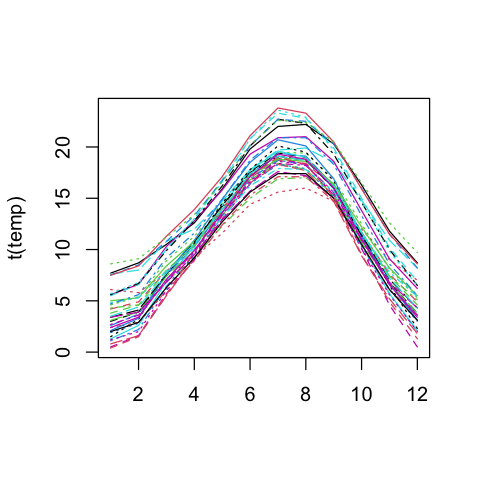

In [3]:
# Ensemble des courbes
options(repr.plot.width = 4, repr.plot.height = 4)
matplot(t(temp), type = "l")

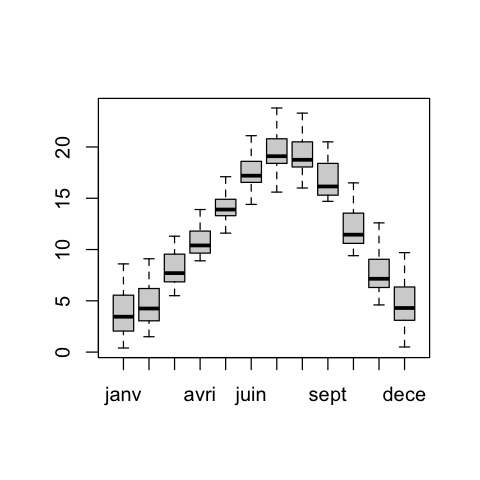

In [4]:
# toutes les distributions
boxplot(temp)

**Q** Que dire des dispersions, de l'homogénéité des unités et des variances?

Dispersion: intervalle inter-quartile (soit la taille des boxs plots). Donc içi ils sont plutôt similiaire.

Homogénéité : Oui même unités

Variances: Pas représenter sur un box plot

**Q** Conséquence pour l'ACP?

ACP réduite sera a peut prêt la même que l'ACP classique.

In [5]:
# Corrélations
cor(temp)

,janv,fevr,mars,avri,mai,juin,juil,aout,sept,octo,nove,dece
janv,1.0000000,0.9885360,0.9199117,0.7825097,0.5995795,0.5663280,0.5398900,0.6296871,0.7907821,0.9276428,0.9753371,0.9948352
fevr,0.9885360,1.0000000,0.9618949,0.8561302,0.6982284,0.6687648,0.6460014,0.7275281,0.8662304,0.9676484,0.9905985,0.9850215
mars,0.9199117,0.9618949,1.0000000,0.9462747,0.8280143,0.8042627,0.7810710,0.8446493,0.9370059,0.9716271,0.9574533,0.9154278
avri,0.7825097,0.8561302,0.9462747,1.0000000,0.9613805,0.9438164,0.9253098,0.9566592,0.9780987,0.9292199,0.8715025,0.7871887
mai,0.5995795,0.6982284,0.8280143,0.9613805,1.0000000,0.9905124,0.9830884,0.9841428,0.9456148,0.8267931,0.7332866,0.6120187
juin,0.5663280,0.6687648,0.8042627,0.9438164,0.9905124,1.0000000,0.9917333,0.9863038,0.9350057,0.8037035,0.7043545,0.5790681
juil,0.5398900,0.6460014,0.7810710,0.9253098,0.9830884,0.9917333,1.0000000,0.9901252,0.9308617,0.7934865,0.6847357,0.5520168
aout,0.6296871,0.7275281,0.8446493,0.9566592,0.9841428,0.9863038,0.9901252,1.0000000,0.9690372,0.8596967,0.7619311,0.6406010
sept,0.7907821,0.8662304,0.9370059,0.9780987,0.9456148,0.9350057,0.9308617,0.9690372,1.0000000,0.9566552,0.8911815,0.7968598
octo,0.9276428,0.9676484,0.9716271,0.9292199,0.8267931,0.8037035,0.7934865,0.8596967,0.9566552,1.0000000,0.9805347,0.9301548


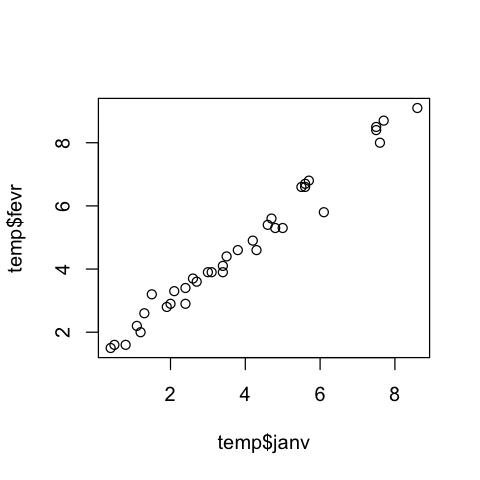

In [7]:
plot(temp$janv, temp$fevr)

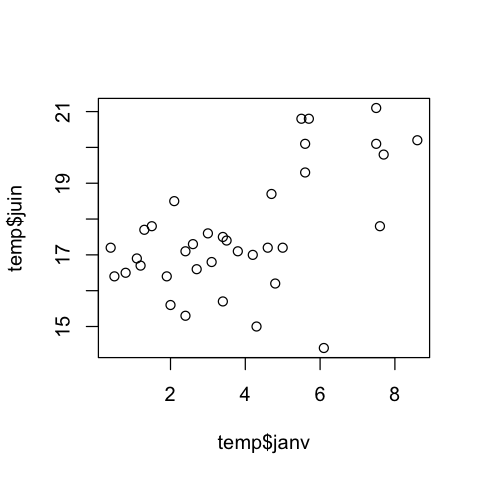

In [8]:
plot(temp$janv, temp$juin)

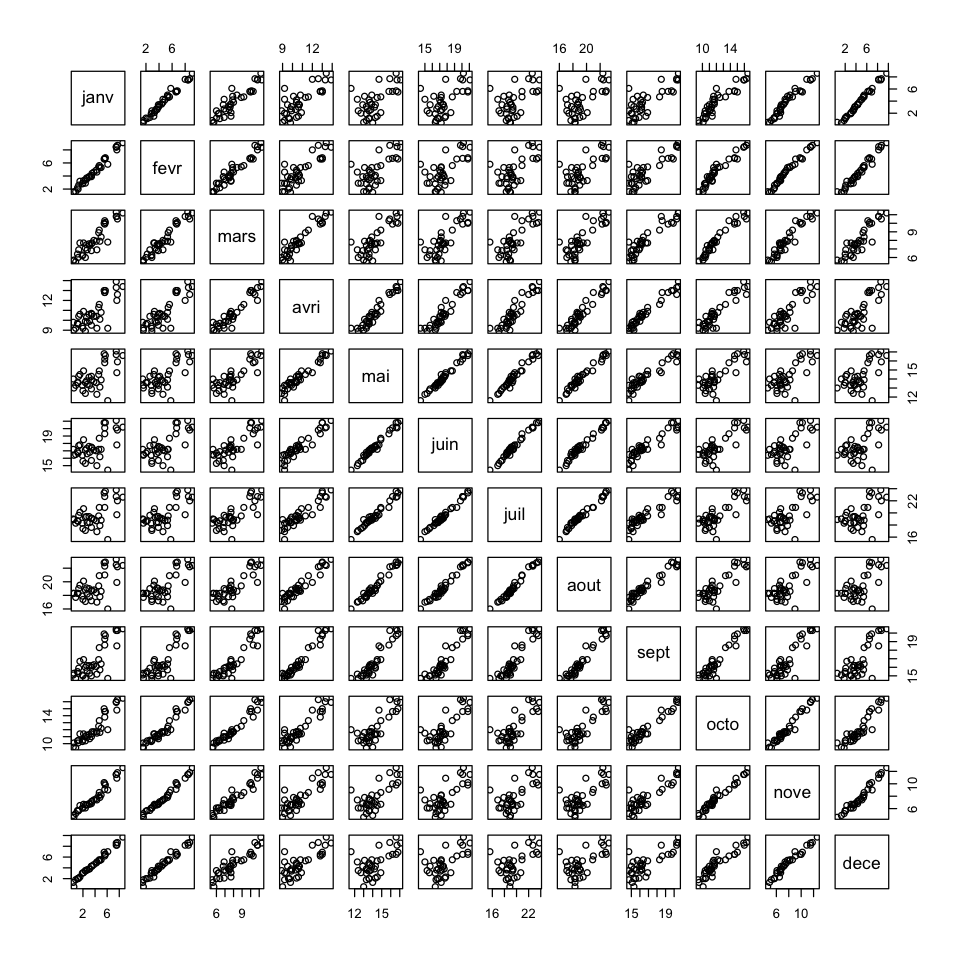

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
pairs(temp)

**Q** Commenter la structure particulière de corrélation entre les variables.

Proximité temporelle entre les variables car on a une relation linéaire entre les mois proche (Cf diag inverse).

### 3.2 Analyse en composantes principales avec R

Importance of components:
                          Comp.1    Comp.2      Comp.3      Comp.4       Comp.5
Standard deviation     6.1292231 2.3611727 0.414769565 0.326941649 0.2069276866
Proportion of Variance 0.8628821 0.1280549 0.003951431 0.002455167 0.0009835078
Cumulative Proportion  0.8628821 0.9909369 0.994888371 0.997343539 0.9983270463
                             Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.1520441653 0.1321092258 0.1188580102 0.0895782803
Proportion of Variance 0.0005309824 0.0004008731 0.0003244872 0.0001843088
Cumulative Proportion  0.9988580287 0.9992589018 0.9995833889 0.9997676977
                            Comp.10      Comp.11      Comp.12
Standard deviation     0.0745158116 5.859145e-02 3.358871e-02
Proportion of Variance 0.0001275374 7.885134e-05 2.591357e-05
Cumulative Proportion  0.9998952351 9.999741e-01 1.000000e+00

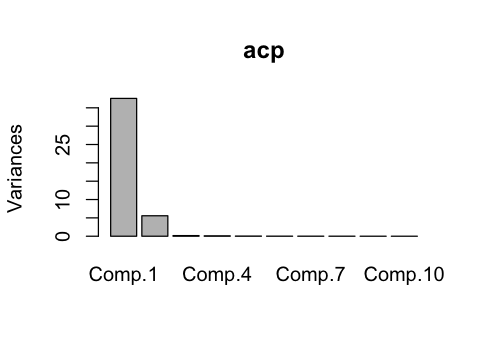

In [12]:
acp <- princomp(temp, cor = FALSE)
summary(acp)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(acp)

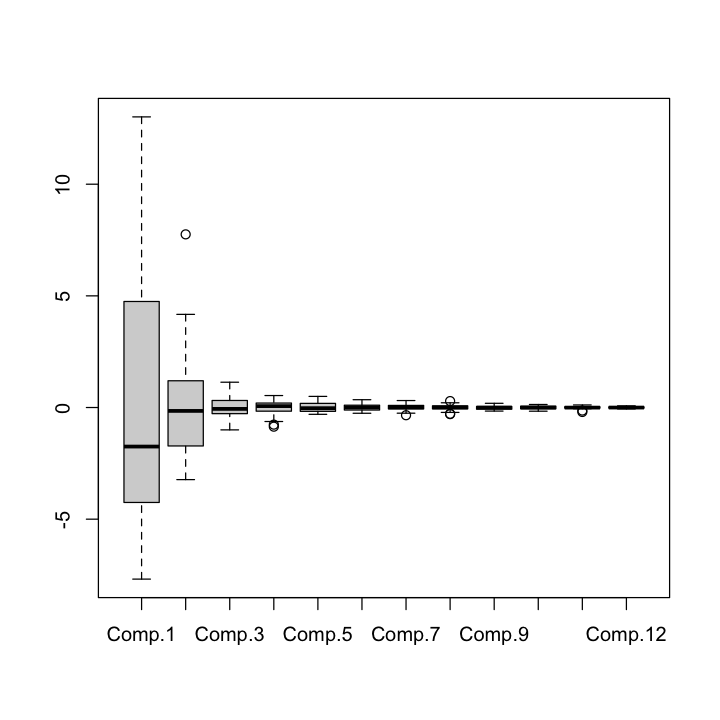

In [16]:
boxplot(data.frame(acp$scores)) 

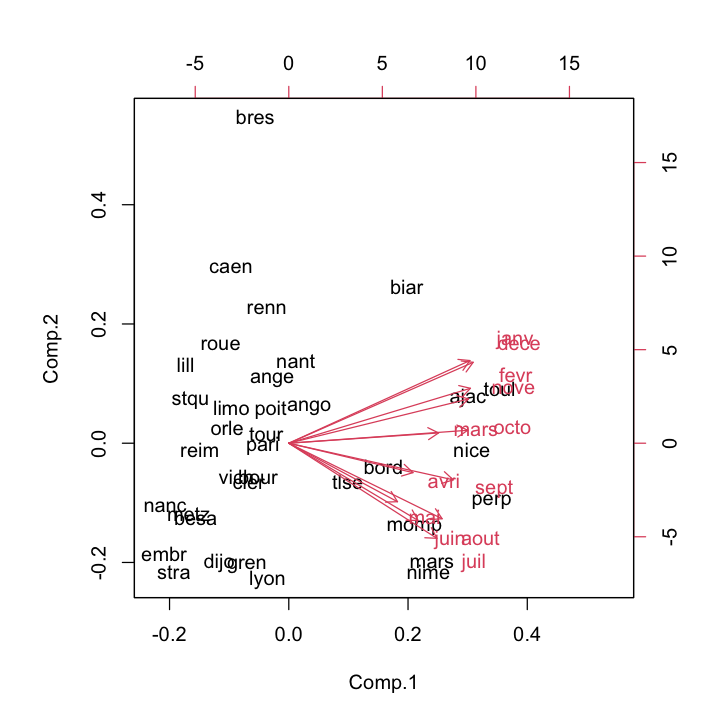

In [17]:
options(repr.plot.width = 6, repr.plot.height = 6)
biplot(acp)

**Q** Analyser les échelles des axes.

En bas l'axe réduit et haut l'axe non réduit.

**Q** Expliciter le choix entre ACP réduite ou non, comparer les différences.

ACP réduite et non réduite équivalente a un changement affine d'axe.

**Q** Combien d'axes faut-il retenir ? Justifier.

Les deux premier axe propre semble pouvoir bien résumé l'informaiton.

**Q** Identifier la ville atypique de l'axe 2. Que faire ?

Brest. Il est abbérant sur le box du 2e axe.

**Q** Interprétation des axes.

Cf avant

**Q** Commenter la position d'Embrun sur les graphiques.

Les données sont ici très particulières, des courbes fonction du temps. En conséquence, les vecteurs propres le sont également et les courbes sont décomposées sur cette base de fonctions discrétisées. 

Vecteurs ou plutôt fonctions propres de l'ACP.

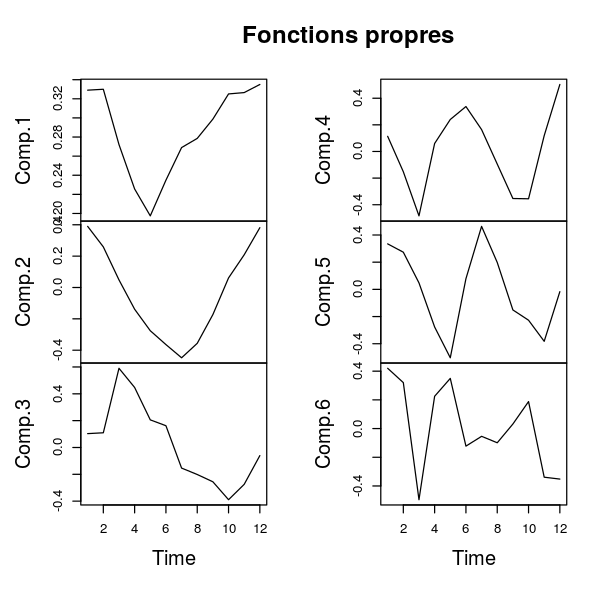

In [11]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot.ts(acp$loadings[,1:6], main = "Fonctions propres")

### 3.3 Librairie FactoMineR
Cette librairie  apporte des compléments intéressants (qualité et options des graphiques, gestion des variables manquantes) et surtout elle vient particulièrement compléter les fonctions de base de R pour l'analyse des variables qualitatives. Voici les principaux résultats de l'ACP.

**Q** Comparer avec les résultats numériques précédemment obtenus.

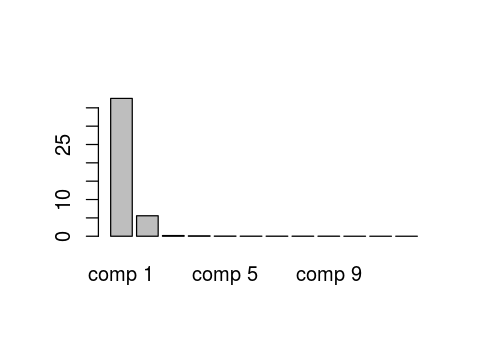

In [12]:
library(FactoMineR)
acp <- PCA(temp, scale.unit = FALSE, ncp = 12, graph = F)
options(repr.plot.width = 4, repr.plot.height = 3)
barplot(acp$eig[,1])

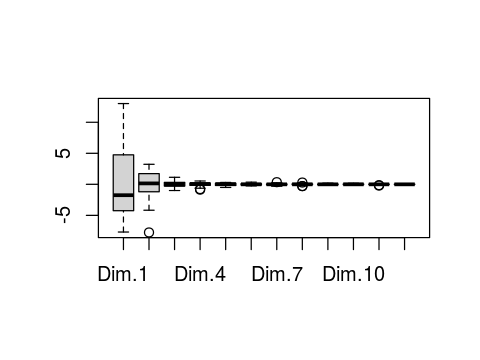

In [13]:
boxplot(acp$ind$coord)

In [14]:
acp$svd$V

0.3290390,-0.38986775,0.10323897,0.11374053,-0.33464352,0.41991694,-0.03799135,0.009415908,0.62535894,-0.11694515,0.122293972,0.08116012
0.3299792,-0.25894200,0.10959282,-0.15238814,-0.27337760,0.32017142,-0.19713748,-0.049425046,-0.69936159,-0.19956697,-0.201528803,0.02704669
0.2721243,-0.04848174,0.59022791,-0.48366714,-0.04750694,-0.49563511,-0.01089671,0.130640789,0.06917833,0.04396375,0.190984072,0.18167230
0.2256422,0.13867035,0.44728993,0.05998080,0.27674747,0.22509261,0.22309526,0.043999772,0.09202144,0.21587666,-0.461667062,-0.52822313
0.1974986,0.27588497,0.20578891,0.24038615,0.50341800,0.34952061,0.08945594,0.218043649,-0.13289208,-0.20290680,0.348433172,0.41637763
0.2348523,0.36424678,0.16208373,0.33757691,-0.07842201,-0.12231944,-0.53922766,-0.567678523,0.05250208,0.16600367,-0.006849728,0.08626309
0.2689712,0.44841122,-0.15360404,0.16440263,-0.46341761,-0.05408440,-0.05973196,0.580726492,-0.06995707,0.13928870,0.187648416,-0.24074892
0.2785683,0.35613931,-0.20142509,-0.09465157,-0.19793622,-0.09896692,0.47519898,-0.162318588,0.11321803,-0.22947791,-0.464575633,0.40446254
0.2987661,0.17265811,-0.25584707,-0.35335024,0.15149284,0.03175098,0.08686552,-0.343440365,0.04041565,-0.37510673,0.405869703,-0.48382859
0.3250880,-0.06102674,-0.38928745,-0.35530687,0.22709208,0.18798525,-0.06478268,-0.003571616,0.01243962,0.69502764,0.017313072,0.19536915
0.3264980,-0.20870484,-0.27465522,0.11877488,0.38224123,-0.33881714,-0.40791482,0.318960811,0.13525372,-0.31694270,-0.333156739,-0.03902356


In [15]:
dimdesc(acp,axes = c(1,2))

,correlation,p.value
octo,0.9917713,6.082440e-32
mars,0.9817701,4.205329e-26
sept,0.9721017,5.410095e-23
nove,0.9677155,6.261790e-22
avri,0.9632506,5.472265e-21
fevr,0.9556016,1.284094e-19
dece,0.9125420,9.296932e-15
janv,0.9082923,2.014294e-14
aout,0.8951904,1.758186e-13
mai,0.8739286,3.428919e-12


**Attention** Cette librairie ajoute à ces techniques exploratoires des résultats d'inférence statistique: *p*-valeurs de test, ellipse de confiance... supposant implicitement un modèle probabiliste: distributions gaussiennes multidimensionnelles; ils sont à utiliser avec grande prudence, plus comme des indicateurs que comme des aides formelles à la décision.

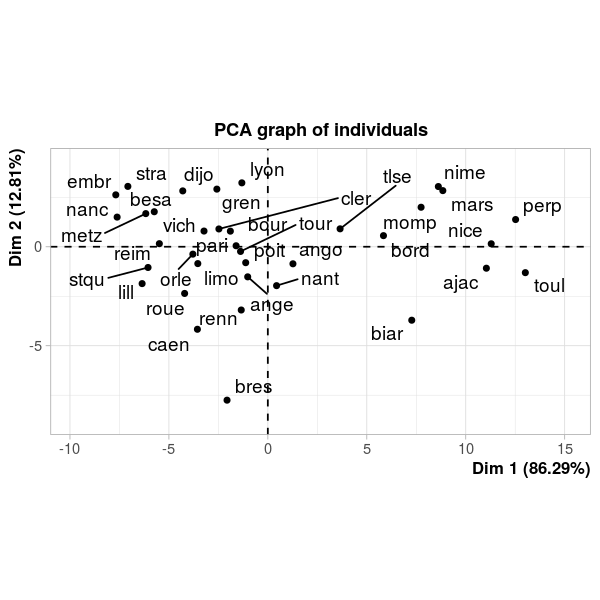

In [16]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(acp)

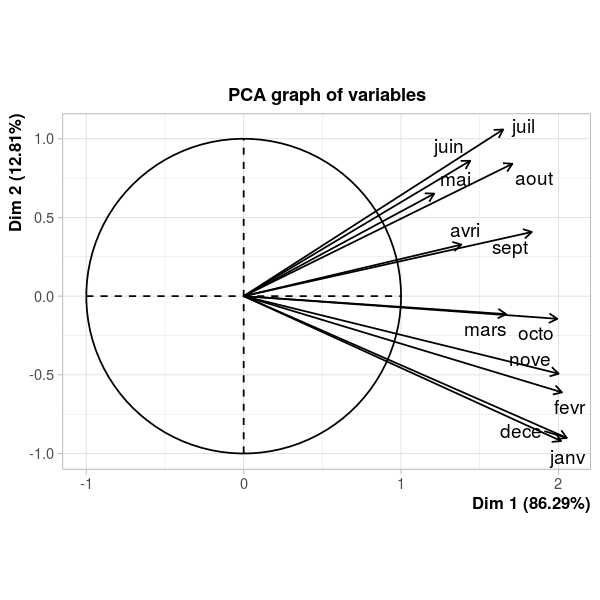

In [17]:
plot(acp, choix = "var")

In [18]:
acp <- PCA(temp, scale.unit = TRUE, ncp = 12, graph = F)
plot(acp, choix = "var")

ERROR: Error in PCA(temp, scale.unit = TRUE, ncp = 12, graph = F): impossible de trouver la fonction "PCA"


**Q** Quelle différence entre les deux graphiques? Quelle différence entre les deux ACP? 

**Q** Pourquoi les deux réprésentations sont-elles finalement très similaires?

Il s'agit également de résoudre la question concernant l'observation atypique sur l'axe 2. Faut-il la conserver? Cette question est abordée en considérant deux ACPs, celle avec et sans ce point afin de s'assurer que sa suppression ne perturbe pas trop les premiers axes, notamment le 2ème. 

**Q** Comment l'observation atypique et-elle exclue?

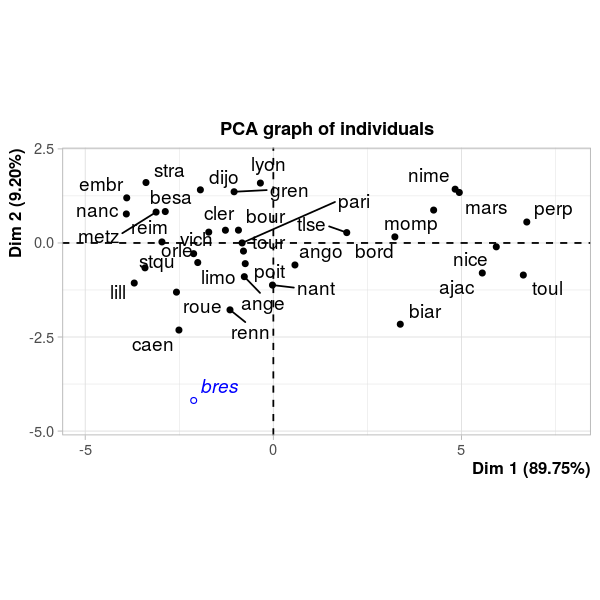

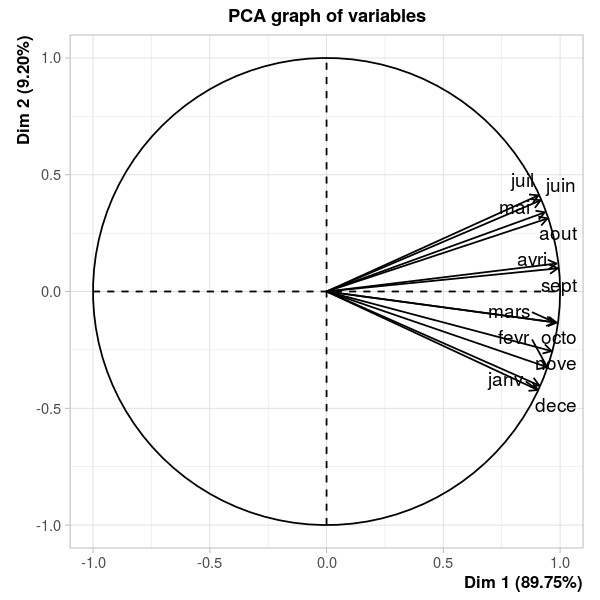

In [19]:
acp <- PCA(temp, scale.unit = TRUE, ncp = 12, graph = F, ind.sup = 8)
plot(acp)
plot(acp, choix = "var")

**Q** L'interprétation des axes a-t-elle été modifiée? Que faire de l'observation atypique?